In [ ]:
#calculating overlap of aadc segmentations with various atlases, determine volume size of each infusion

In [1]:
from nilearn import image
from nilearn.image import load_img
from nilearn.image import math_img
from nilearn.image import resample_to_img
import numpy as np
import nibabel as nib
import pandas as pd
import os, glob
from matplotlib import pyplot as plt
import seaborn as sns

In [47]:
#resample volumes
#load segmentations
infusion_vols_pth = sorted(glob.glob(os.path.join('/Volumes/Cingulate/AADC/All_Seg/','*_bi_binarized.nii.gz')))
infusion_vols = [image.load_img(i).get_fdata() for i in infusion_vols_pth]

In [51]:
#load atlas and csv
atlas_orig = load_img('/Users/jp1590/Documents/MATLAB/leaddbs/templates/space/MNI152NLin2009bAsym/labeling/Allen Brain Atlas (Ding 2020).nii').get_fdata()
atlas_idx = pd.read_csv('/Users/jp1590/Desktop/AADC_Atlases/Allen_Atlas_OG.csv')
# atlas_vols = np.unique(atlas_orig, return_counts=True)
# atlas_vols = pd.DataFrame(np.column_stack([atlas_vols[0],atlas_vols[1]]),columns=['label','abs_vol'])
# atlas_idx = atlas_idx.merge(atlas_vols, left_on='label',right_on='label')
# atlas_idx['label'].astype(int)

# for i in atlas_idx['area']:
#     atlas_idx['area'] = atlas_idx['area'].replace(i,i[:-3])
    
# #sum up rh and lh for duplicate names
# atlas_idx = pd.pivot_table(atlas_idx, index=['area'],values=['abs_vol'],aggfunc='sum')

# atlas_idx.to_csv('/Users/jp1590/Desktop/AADC_Atlases/Allen Brain Atlas_bi.csv')

In [52]:
#allen atlas
atlas_vols = np.unique(atlas_orig, return_counts=True)
atlas_vols = pd.DataFrame(np.column_stack([atlas_vols[0],atlas_vols[1]]),columns=['label','abs_vol'])
atlas_idx = atlas_idx.merge(atlas_vols, left_on='label',right_on='label')
atlas_idx['label'].astype(int)

#calculate overlap in atlas for each subject
analysis_type = 'bin' #'bin','efield' #ensure you select efields to calculate!! 
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    vol_over = atlas.copy()
    vol_overlap = vol_over[v>0]
    unique_vol_overlap = np.unique(vol_overlap, return_counts=True)
    if analysis_type=='bin':
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],unique_vol_overlap[1]]),columns=['label',aadc_id+'_overlap'])

    elif analysis_type=='efield':
        mean_vals=[]
        v2 = v[v>0]
        for u in unique_vol_overlap[0]:
            mean_val = np.mean(v2[vol_overlap==u])
            mean_vals.append(mean_val)
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],mean_vals]),columns=['label',aadc_id+'_overlap'])
     
    atlas_idx = atlas_idx.merge(overlap_df,how='left',left_on='label',right_on='label')

#make percentages column
# for i,v in enumerate(infusion_vols):
#     aadc_id = infusion_vols_pth[i].split('/')[-1]
#     if analysis_type=='bin':
#         atlas_idx[aadc_id+'_overlap_perc'] = atlas_idx[aadc_id+'_overlap']/atlas_idx['abs_vol']*100
        
# atlas_idx.replace(0,np.nan,inplace=True)
        
# #Combine multiple regions and plot % for individual patients
# if analysis_type=='bin':
#     abs_overlap_ids = [col for col in atlas_idx.columns if col.endswith('_overlap')]
#     abs_overlap_cols = atlas_idx[abs_overlap_ids+['area','abs_vol']]
#     abs_overlap_ids = [col for col in atlas_idx.columns if col.endswith('_overlap_perc')]
#     abs_overlap_cols = atlas_idx[abs_overlap_ids+['area']]
#     abs_overlap_cols = pd.melt(abs_overlap_cols,id_vars='area',value_vars=abs_overlap_ids,
#                                var_name='ID', value_name='perc').dropna()

# #get sorted list
# medians = abs_overlap_cols.groupby('area')['perc'].median().sort_values(ascending=False)
# sorted_ids = medians.index.tolist()

In [78]:
atdf = pd.read_csv('/Users/jp1590/Desktop/AADC_Atlases/allen/area-av-sub.csv')
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    if analysis_type=='bin':
        atdf[aadc_id+'_overlap_perc'] = atdf[aadc_id+'_overlap']/atdf['abs_vol']*100
        
atdf.replace(0,np.nan,inplace=True)
        
#Combine multiple regions and plot % for individual patients
if analysis_type=='bin':
    abs_overlap_ids = [col for col in atdf.columns if col.endswith('_overlap')]
    abs_overlap_cols = atdf[abs_overlap_ids+['area','abs_vol']]
    abs_overlap_ids = [col for col in atdf.columns if col.endswith('_overlap_perc')]
    abs_overlap_cols = atdf[abs_overlap_ids+['area']]
    abs_overlap_cols = pd.melt(abs_overlap_cols,id_vars='area',value_vars=abs_overlap_ids,
                               var_name='ID', value_name='perc').dropna()

#get sorted list
medians = abs_overlap_cols.groupby('area')['perc'].median().sort_values(ascending=False)
sorted_ids = medians.index.tolist()

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_72167/2286675634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=abs_overlap_cols['area'],y=abs_overlap_cols['perc'],palette='flare',order=sorted_ids)


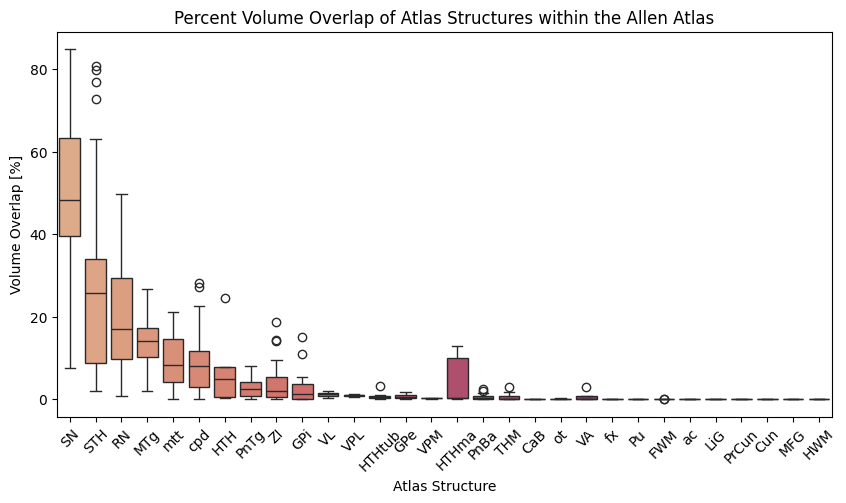

In [81]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=abs_overlap_cols['area'],y=abs_overlap_cols['perc'],palette='flare',order=sorted_ids)
ax.set(xlabel = 'Atlas Structure',ylabel='Volume Overlap [%]',title='Percent Volume Overlap of Atlas Structures within the Allen Atlas')
ax.tick_params(axis='x', rotation=45)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_31487/3623170337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_inf_vol_df['ID'],y=total_inf_vol_df['Total_Infusion_Volume'],palette='magma_r')


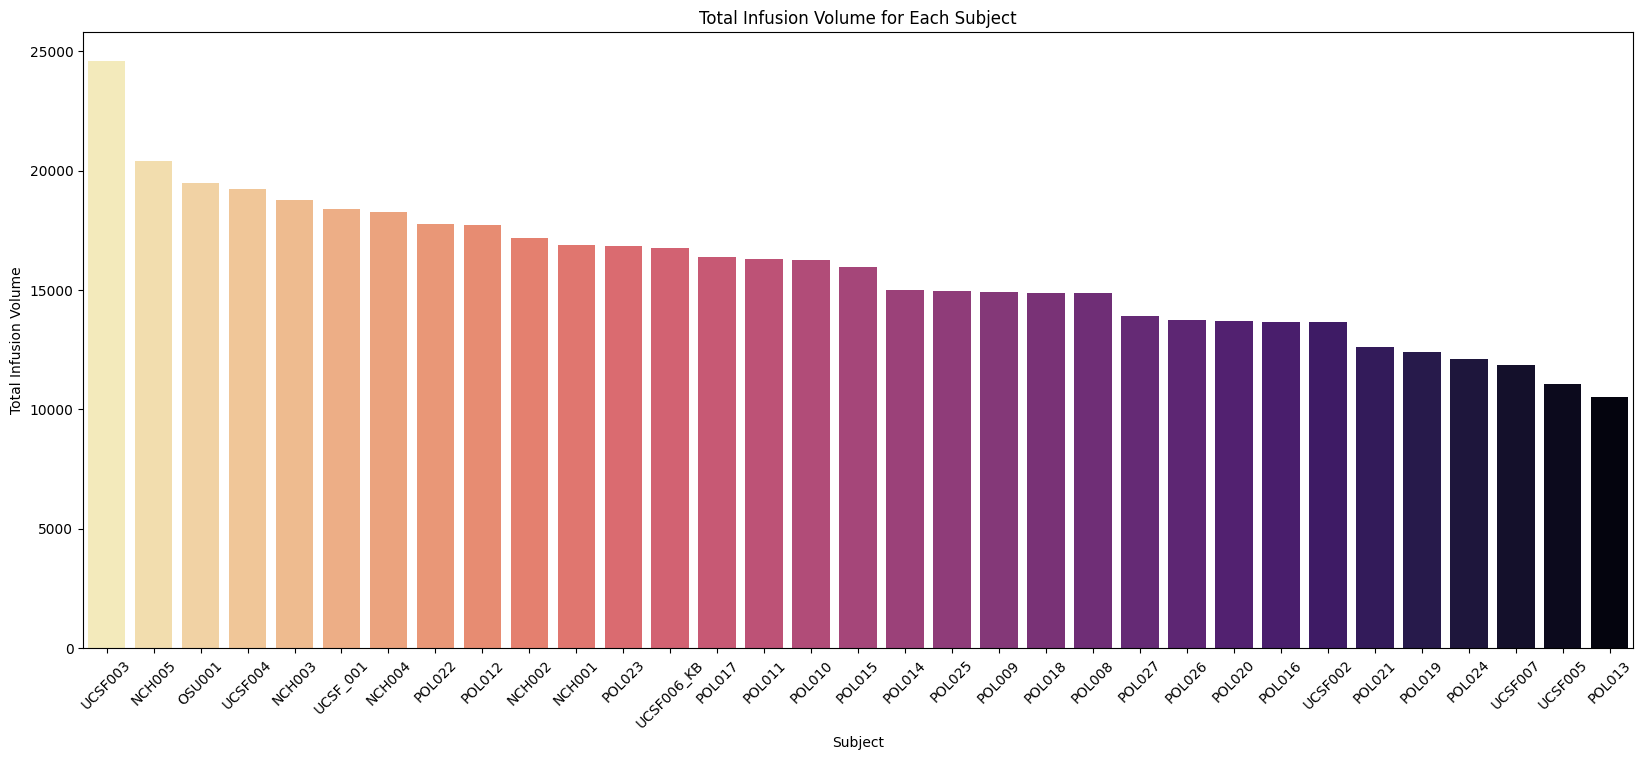

In [17]:
#bar plot of each individual subject's total volume
total_inf_vol_df = pd.read_csv('/Users/jp1590/Desktop/AADC_Atlases/total_inf_vol.csv')
plt.figure(figsize=(20,8))
ax = sns.barplot(x=total_inf_vol_df['ID'],y=total_inf_vol_df['Total_Infusion_Volume'],palette='magma_r')
ax.set(title = 'Total Infusion Volume for Each Subject',xlabel='Subject', ylabel='Total Infusion Volume')
ax.tick_params(axis='x', rotation=45)
plt.savefig('/Volumes/Cingulate/AADC/Graphs/Total Infusion Volume for Each Subject.png')

In [18]:
#Combine centers
total_center_df = pd.read_csv('/Users/jp1590/Desktop/AADC_Atlases/total_inf_vol_centers.csv')
for i in total_center_df['ID']:
    if i.startswith('NCH'):
        total_center_df['ID'] = total_center_df['ID'].replace(i,'NCH')
    elif i.startswith('POL'):
        total_center_df['ID'] = total_center_df['ID'].replace(i,'POL')
    elif i.startswith('UCSF'):
        total_center_df['ID'] = total_center_df['ID'].replace(i,'UCSF')
    else:
        total_center_df['ID'] = total_center_df['ID'].replace(i,'OSU')

In [19]:
ctr_medians = total_center_df.groupby('ID')['Total_Infusion_Volume'].median().sort_values(ascending=False)
ctr_sorted_ids = ctr_medians.index.tolist()

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_31487/2938283205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=total_center_df['ID'],x=total_center_df['Total_Infusion_Volume'],palette='magma_r',order=ctr_sorted_ids)


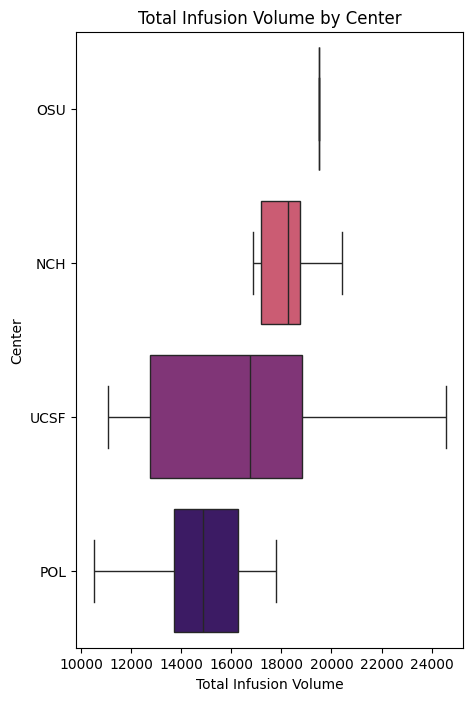

In [20]:
#Total Infusion Volume by Center
plt.figure(figsize=(5,8))
ax = sns.boxplot(y=total_center_df['ID'],x=total_center_df['Total_Infusion_Volume'],palette='magma_r',order=ctr_sorted_ids)
ax.set(ylabel='Center', xlabel='Total Infusion Volume',title='Total Infusion Volume by Center')
plt.savefig('/Volumes/Cingulate/AADC/Graphs/Total Infusion Volume by Center.png')

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_31487/2850910969.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=sel_abs_overlap_cols['area'],y=sel_abs_overlap_cols['perc'],palette="OrRd")


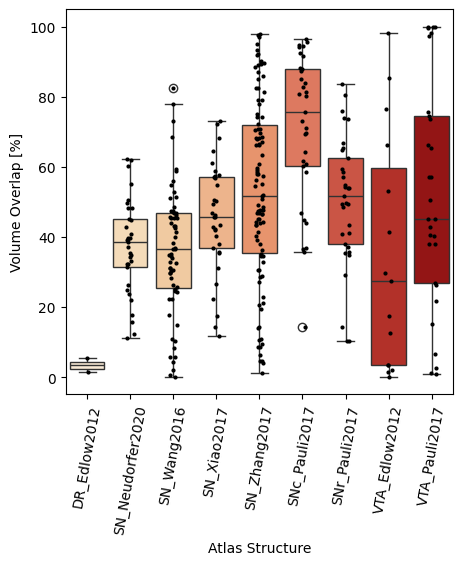

In [35]:
sel_abs_overlap_cols = pd.read_csv('/Users/jp1590/Desktop/AADC_Atlases/selection_abs_overlap_cols.csv')
sel_medians = sel_abs_overlap_cols.groupby('area')['perc'].median().sort_values(ascending=False)
sel_sorted_ids = sel_medians.index.tolist()
plt.figure(figsize=(5,5))
ax = sns.stripplot(data=sel_abs_overlap_cols, x="area", y="perc", s=3,color='black')
ax = sns.boxplot(x=sel_abs_overlap_cols['area'],y=sel_abs_overlap_cols['perc'],palette="OrRd")
ax.set(xlabel = 'Atlas Structure',ylabel='Volume Overlap [%]')
ax.tick_params(axis='x', rotation=80)
plt.savefig('/Volumes/Cingulate/AADC/Graphs/Selected Atlases Overlap.png')

In [22]:
#harvard aan atlas
#load atlas and calculate absolute values
aan_atlas = load_img('/Users/jp1590/Downloads/AADC_Def_atlases/Harvard AAN atlas (Edlow 2012).nii.gz').get_fdata()
aan_atlas_idx = pd.read_csv('/Users/jp1590/Downloads/AADC_Def_atlases/Harvard AAN atlas (Edlow 2012).csv')
aan_atlas_vols = np.unique(aan_atlas, return_counts=True)
aan_atlas_vols = pd.DataFrame(np.column_stack([aan_atlas_vols[0],aan_atlas_vols[1]]),columns=['label','abs_vol'])
aan_atlas_idx = aan_atlas_idx.merge(aan_atlas_vols, left_on='label',right_on='label')

#calculate overlap in atlas for each subject
analysis_type = 'bin' #'bin','efield' #ensure you select efields to calculate!! 
total_inf_vol = []
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    vol_over = aan_atlas.copy()
    vol_overlap = vol_over[v>0]
    total_inf_vol.append(np.sum(v)) #Sum voxel values contained in patient-specific infusion
    unique_vol_overlap = np.unique(vol_overlap, return_counts=True)
    if analysis_type=='bin':
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],unique_vol_overlap[1]]),columns=['label',aadc_id+'_overlap'])

    elif analysis_type=='efield':
        mean_vals=[]
        v2 = v[v>0]
        for u in unique_vol_overlap[0]:
            mean_val = np.mean(v2[vol_overlap==u])
            mean_vals.append(mean_val)
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],mean_vals]),columns=['label',aadc_id+'_overlap'])
     
    aan_atlas_idx = aan_atlas_idx.merge(overlap_df,how='left',left_on='label',right_on='label')
    if analysis_type=='bin':
        aan_atlas_idx[aadc_id+'_overlap_perc'] = aan_atlas_idx[aadc_id+'_overlap']/aan_atlas_idx['abs_vol']*100
        
#Combine multiple regions and plot % for individual patients
if analysis_type=='bin':
    aan_abs_overlap_ids = [col for col in aan_atlas_idx.columns if col.endswith('_overlap')]
    aan_abs_overlap_cols = aan_atlas_idx[aan_abs_overlap_ids+['area','abs_vol']]
    aan_abs_overlap_ids = [col for col in aan_atlas_idx.columns if col.endswith('_overlap_perc')]
    aan_abs_overlap_cols = aan_atlas_idx[aan_abs_overlap_ids+['area']]
    aan_abs_overlap_cols = pd.melt(aan_abs_overlap_cols,id_vars='area',value_vars=aan_abs_overlap_ids,
                               var_name='ID', value_name='perc').dropna()

#get sorted list
aan_medians = aan_abs_overlap_cols.groupby('area')['perc'].median().sort_values(ascending=False)
aan_sorted_ids = aan_medians.index.tolist()

In [23]:
#CIT168 atlas
#load atlas and calculate absolute values
cit_atlas = load_img('/Users/jp1590/Downloads/AADC_Def_atlases/CIT168_Reinf_Learn (Pauli 2017) - imported from CIT168.nii.gz').get_fdata()
cit_atlas_idx = pd.read_csv('/Users/jp1590/Downloads/AADC_Def_atlases/CIT168_Reinf_Learn (Pauli 2017) - imported from CIT168.csv')
cit_atlas_vols = np.unique(cit_atlas, return_counts=True)
cit_atlas_vols = pd.DataFrame(np.column_stack([cit_atlas_vols[0],cit_atlas_vols[1]]),columns=['label','abs_vol'])
cit_atlas_idx = cit_atlas_idx.merge(cit_atlas_vols, left_on='label',right_on='label')

#calculate overlap in atlas for each subject
analysis_type = 'bin' #'bin','efield' #ensure you select efields to calculate!! 
total_inf_vol = []
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    vol_over = cit_atlas.copy()
    vol_overlap = vol_over[v>0]
    total_inf_vol.append(np.sum(v)) #Sum voxel values contained in patient-specific infusion
    unique_vol_overlap = np.unique(vol_overlap, return_counts=True)
    if analysis_type=='bin':
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],unique_vol_overlap[1]]),columns=['label',aadc_id+'_overlap'])

    elif analysis_type=='efield':
        mean_vals=[]
        v2 = v[v>0]
        for u in unique_vol_overlap[0]:
            mean_val = np.mean(v2[vol_overlap==u])
            mean_vals.append(mean_val)
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],mean_vals]),columns=['label',aadc_id+'_overlap'])
     
    cit_atlas_idx = cit_atlas_idx.merge(overlap_df,how='left',left_on='label',right_on='label')
    if analysis_type=='bin':
        cit_atlas_idx[aadc_id+'_overlap_perc'] = cit_atlas_idx[aadc_id+'_overlap']/cit_atlas_idx['abs_vol']*100
        
#Combine multiple regions and plot % for individual patients
if analysis_type=='bin':
    cit_abs_overlap_ids = [col for col in cit_atlas_idx.columns if col.endswith('_overlap')]
    cit_abs_overlap_cols = cit_atlas_idx[cit_abs_overlap_ids+['area','abs_vol']]
    cit_abs_overlap_ids = [col for col in cit_atlas_idx.columns if col.endswith('_overlap_perc')]
    cit_abs_overlap_cols = cit_atlas_idx[cit_abs_overlap_ids+['area']]
    cit_abs_overlap_cols = pd.melt(cit_abs_overlap_cols,id_vars='area',value_vars=cit_abs_overlap_ids,
                               var_name='ID', value_name='perc').dropna()

#get sorted list
cit_medians = cit_abs_overlap_cols.groupby('area')['perc'].median().sort_values(ascending=False)
cit_sorted_ids = cit_medians.index.tolist()

In [30]:
#Nigral atlas
#load atlas and calculate absolute values
n_atlas = load_img('/Users/jp1590/Downloads/AADC_Def_atlases/Nigral organization atlas (Zhang 2017).nii.gz').get_fdata()
n_atlas_idx = pd.read_csv('/Users/jp1590/Downloads/AADC_Def_atlases/Nigral organization atlas (Zhang 2017).csv')
n_atlas_vols = np.unique(n_atlas, return_counts=True)
n_atlas_vols = pd.DataFrame(np.column_stack([n_atlas_vols[0],n_atlas_vols[1]]),columns=['label','abs_vol'])
n_atlas_idx = n_atlas_idx.merge(n_atlas_vols, left_on='label',right_on='label')

#calculate overlap in atlas for each subject
analysis_type = 'bin' #'bin','efield' #ensure you select efields to calculate!! 
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    vol_over = n_atlas.copy()
    vol_overlap = vol_over[v>0]
    unique_vol_overlap = np.unique(vol_overlap, return_counts=True)
    if analysis_type=='bin':
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],unique_vol_overlap[1]]),columns=['label',aadc_id+'_overlap'])

    elif analysis_type=='efield':
        mean_vals=[]
        v2 = v[v>0]
        for u in unique_vol_overlap[0]:
            mean_val = np.mean(v2[vol_overlap==u])
            mean_vals.append(mean_val)
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],mean_vals]),columns=['label',aadc_id+'_overlap'])
     
    n_atlas_idx = n_atlas_idx.merge(overlap_df,how='left',left_on='label',right_on='label')

n_atlas_idx['abs_vol'] = n_atlas_idx['abs_vol'].astype(int)
n_atlas_idx['label'] = n_atlas_idx['label'].astype(str)
n_atlas_idx['hemisphere'] = n_atlas_idx['hemisphere'].astype(str)
aggregate_funcs = {
    'label': lambda s: ', '.join(set(s)),
    'area': lambda s: ', '.join(set(s)),
    'hemisphere': lambda s: ', '.join(set(s)),
    'abs_vol': sum,
    'NCH001_bi_binarized.nii.gz_overlap': sum,
    'NCH002_bi_binarized.nii.gz_overlap': sum,
    'NCH003_bi_binarized.nii.gz_overlap': sum,
    'NCH004_bi_binarized.nii.gz_overlap': sum,
    'NCH005_bi_binarized.nii.gz_overlap': sum,
    'OSU001_bi_binarized.nii.gz_overlap': sum,
    'POL008_bi_binarized.nii.gz_overlap': sum,
    'POL009_bi_binarized.nii.gz_overlap': sum,
    'POL010_bi_binarized.nii.gz_overlap': sum,
    'POL011_bi_binarized.nii.gz_overlap': sum,
    'POL012_bi_binarized.nii.gz_overlap': sum,
    'POL013_bi_binarized.nii.gz_overlap': sum,
    'POL014_bi_binarized.nii.gz_overlap': sum,
    'POL015_bi_binarized.nii.gz_overlap': sum,
    'POL016_bi_binarized.nii.gz_overlap': sum,
    'POL017_bi_binarized.nii.gz_overlap': sum,
    'POL018_bi_binarized.nii.gz_overlap': sum,
    'POL019_bi_binarized.nii.gz_overlap': sum,
    'POL020_bi_binarized.nii.gz_overlap': sum,
    'POL021_bi_binarized.nii.gz_overlap': sum,
    'POL022_bi_binarized.nii.gz_overlap': sum,
    'POL023_bi_binarized.nii.gz_overlap': sum,
    'POL024_bi_binarized.nii.gz_overlap': sum,
    'POL025_bi_binarized.nii.gz_overlap': sum,
    'POL026_bi_binarized.nii.gz_overlap': sum,
    'POL027_bi_binarized.nii.gz_overlap': sum,
    'UCSF002_bi_binarized.nii.gz_overlap': sum,
    'UCSF003_bi_binarized.nii.gz_overlap': sum,
    'UCSF004_bi_binarized.nii.gz_overlap': sum,
    'UCSF005_bi_binarized.nii.gz_overlap': sum,
    'UCSF006_KB_bi_binarized.nii.gz_overlap': sum,
    'UCSF007_bi_binarized.nii.gz_overlap': sum,
    'UCSF_001_bi_binarized.nii.gz_overlap': sum
}
n_atlas_idx = n_atlas_idx.groupby(n_atlas_idx['area']).aggregate(aggregate_funcs)

#make percentages column
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    if analysis_type=='bin':
        n_atlas_idx[aadc_id+'_overlap_perc'] = n_atlas_idx[aadc_id+'_overlap']/n_atlas_idx['abs_vol']*100
        
n_atlas_idx.replace(0,np.nan,inplace=True)
        
#Combine multiple regions and plot % for individual patients
if analysis_type=='bin':
    n_abs_overlap_ids = [col for col in n_atlas_idx.columns if col.endswith('_overlap')]
    n_abs_overlap_cols = n_atlas_idx[n_abs_overlap_ids+['area','abs_vol']]
    n_abs_overlap_ids = [col for col in n_atlas_idx.columns if col.endswith('_overlap_perc')]
    n_abs_overlap_cols = n_atlas_idx[n_abs_overlap_ids+['area']]
    n_abs_overlap_cols = pd.melt(n_abs_overlap_cols,id_vars='area',value_vars=n_abs_overlap_ids,
                               var_name='ID', value_name='perc').dropna()

#get sorted list
n_medians = n_abs_overlap_cols.groupby('area')['perc'].median().sort_values(ascending=False)
n_sorted_ids = n_medians.index.tolist()

In [31]:
#MNI PD25 atlas
#load atlas and calculate absolute values
mp_atlas = load_img('/Users/jp1590/Downloads/AADC_Def_atlases/MNI PD25 subcortical (Xiao 2017).nii.gz').get_fdata()
mp_atlas_idx = pd.read_csv('/Users/jp1590/Downloads/AADC_Def_atlases/MNI PD25 subcortical (Xiao 2017).csv')
mp_atlas_vols = np.unique(mp_atlas, return_counts=True)
mp_atlas_vols = pd.DataFrame(np.column_stack([mp_atlas_vols[0],mp_atlas_vols[1]]),columns=['label','abs_vol'])
mp_atlas_idx = mp_atlas_idx.merge(mp_atlas_vols, left_on='label',right_on='label')

#calculate overlap in atlas for each subject
analysis_type = 'bin' #'bin','efield' #ensure you select efields to calculate!! 
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    vol_over = mp_atlas.copy()
    vol_overlap = vol_over[v>0]
    unique_vol_overlap = np.unique(vol_overlap, return_counts=True)
    if analysis_type=='bin':
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],unique_vol_overlap[1]]),columns=['label',aadc_id+'_overlap'])

    elif analysis_type=='efield':
        mean_vals=[]
        v2 = v[v>0]
        for u in unique_vol_overlap[0]:
            mean_val = np.mean(v2[vol_overlap==u])
            mean_vals.append(mean_val)
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],mean_vals]),columns=['label',aadc_id+'_overlap'])
     
    mp_atlas_idx = mp_atlas_idx.merge(overlap_df,how='left',left_on='label',right_on='label')

mp_atlas_idx['abs_vol'] = mp_atlas_idx['abs_vol'].astype(int)
mp_atlas_idx['label'] = mp_atlas_idx['label'].astype(str)
mp_atlas_idx['hemisphere'] = mp_atlas_idx['hemisphere'].astype(str)
aggregate_funcs = {
    'label': lambda s: ', '.join(set(s)),
    'area': lambda s: ', '.join(set(s)),
    'hemisphere': lambda s: ', '.join(set(s)),
    'abs_vol': sum,
    'NCH001_bi_binarized.nii.gz_overlap': sum,
    'NCH002_bi_binarized.nii.gz_overlap': sum,
    'NCH003_bi_binarized.nii.gz_overlap': sum,
    'NCH004_bi_binarized.nii.gz_overlap': sum,
    'NCH005_bi_binarized.nii.gz_overlap': sum,
    'OSU001_bi_binarized.nii.gz_overlap': sum,
    'POL008_bi_binarized.nii.gz_overlap': sum,
    'POL009_bi_binarized.nii.gz_overlap': sum,
    'POL010_bi_binarized.nii.gz_overlap': sum,
    'POL011_bi_binarized.nii.gz_overlap': sum,
    'POL012_bi_binarized.nii.gz_overlap': sum,
    'POL013_bi_binarized.nii.gz_overlap': sum,
    'POL014_bi_binarized.nii.gz_overlap': sum,
    'POL015_bi_binarized.nii.gz_overlap': sum,
    'POL016_bi_binarized.nii.gz_overlap': sum,
    'POL017_bi_binarized.nii.gz_overlap': sum,
    'POL018_bi_binarized.nii.gz_overlap': sum,
    'POL019_bi_binarized.nii.gz_overlap': sum,
    'POL020_bi_binarized.nii.gz_overlap': sum,
    'POL021_bi_binarized.nii.gz_overlap': sum,
    'POL022_bi_binarized.nii.gz_overlap': sum,
    'POL023_bi_binarized.nii.gz_overlap': sum,
    'POL024_bi_binarized.nii.gz_overlap': sum,
    'POL025_bi_binarized.nii.gz_overlap': sum,
    'POL026_bi_binarized.nii.gz_overlap': sum,
    'POL027_bi_binarized.nii.gz_overlap': sum,
    'UCSF002_bi_binarized.nii.gz_overlap': sum,
    'UCSF003_bi_binarized.nii.gz_overlap': sum,
    'UCSF004_bi_binarized.nii.gz_overlap': sum,
    'UCSF005_bi_binarized.nii.gz_overlap': sum,
    'UCSF006_KB_bi_binarized.nii.gz_overlap': sum,
    'UCSF007_bi_binarized.nii.gz_overlap': sum,
    'UCSF_001_bi_binarized.nii.gz_overlap': sum
}
mp_atlas_idx = mp_atlas_idx.groupby(mp_atlas_idx['area']).aggregate(aggregate_funcs)

#make percentages column
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    if analysis_type=='bin':
        mp_atlas_idx[aadc_id+'_overlap_perc'] = mp_atlas_idx[aadc_id+'_overlap']/mp_atlas_idx['abs_vol']*100
        
mp_atlas_idx.replace(0,np.nan,inplace=True)
        
#Combine multiple regions and plot % for individual patients
if analysis_type=='bin':
    mp_abs_overlap_ids = [col for col in mp_atlas_idx.columns if col.endswith('_overlap')]
    mp_abs_overlap_cols = mp_atlas_idx[mp_abs_overlap_ids+['area','abs_vol']]
    mp_abs_overlap_ids = [col for col in mp_atlas_idx.columns if col.endswith('_overlap_perc')]
    mp_abs_overlap_cols = mp_atlas_idx[mp_abs_overlap_ids+['area']]
    mp_abs_overlap_cols = pd.melt(mp_abs_overlap_cols,id_vars='area',value_vars=mp_abs_overlap_ids,
                               var_name='ID', value_name='perc').dropna()

#get sorted list
mp_medians = mp_abs_overlap_cols.groupby('area')['perc'].median().sort_values(ascending=False)
mp_sorted_ids = mp_medians.index.tolist()

In [32]:
#Human Hypothalamus Atlas
#load atlas and calculate absolute values
hh_atlas = load_img('/Users/jp1590/Downloads/AADC_Def_atlases/Atlas of the Human Hypothalamus (Neudorfer & Germann 2020).nii.gz').get_fdata()
hh_atlas_idx = pd.read_csv('/Users/jp1590/Downloads/AADC_Def_atlases/Atlas of the Human Hypothalamus (Neudorfer & Germann 2020).csv')
hh_atlas_vols = np.unique(hh_atlas, return_counts=True)
hh_atlas_vols = pd.DataFrame(np.column_stack([hh_atlas_vols[0],hh_atlas_vols[1]]),columns=['label','abs_vol'])
hh_atlas_idx = hh_atlas_idx.merge(hh_atlas_vols, left_on='label',right_on='label')

#calculate overlap in atlas for each subject
analysis_type = 'bin' #'bin','efield' #ensure you select efields to calculate!! 
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    vol_over = hh_atlas.copy()
    vol_overlap = vol_over[v>0]
    unique_vol_overlap = np.unique(vol_overlap, return_counts=True)
    if analysis_type=='bin':
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],unique_vol_overlap[1]]),columns=['label',aadc_id+'_overlap'])

    elif analysis_type=='efield':
        mean_vals=[]
        v2 = v[v>0]
        for u in unique_vol_overlap[0]:
            mean_val = np.mean(v2[vol_overlap==u])
            mean_vals.append(mean_val)
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],mean_vals]),columns=['label',aadc_id+'_overlap'])
     
    hh_atlas_idx = hh_atlas_idx.merge(overlap_df,how='left',left_on='label',right_on='label')

hh_atlas_idx['abs_vol'] = hh_atlas_idx['abs_vol'].astype(int)
hh_atlas_idx['label'] = hh_atlas_idx['label'].astype(str)
hh_atlas_idx['hemisphere'] = hh_atlas_idx['hemisphere'].astype(str)
aggregate_funcs = {
    'label': lambda s: ', '.join(set(s)),
    'area': lambda s: ', '.join(set(s)),
    'hemisphere': lambda s: ', '.join(set(s)),
    'abs_vol': sum,
    'NCH001_bi_binarized.nii.gz_overlap': sum,
    'NCH002_bi_binarized.nii.gz_overlap': sum,
    'NCH003_bi_binarized.nii.gz_overlap': sum,
    'NCH004_bi_binarized.nii.gz_overlap': sum,
    'NCH005_bi_binarized.nii.gz_overlap': sum,
    'OSU001_bi_binarized.nii.gz_overlap': sum,
    'POL008_bi_binarized.nii.gz_overlap': sum,
    'POL009_bi_binarized.nii.gz_overlap': sum,
    'POL010_bi_binarized.nii.gz_overlap': sum,
    'POL011_bi_binarized.nii.gz_overlap': sum,
    'POL012_bi_binarized.nii.gz_overlap': sum,
    'POL013_bi_binarized.nii.gz_overlap': sum,
    'POL014_bi_binarized.nii.gz_overlap': sum,
    'POL015_bi_binarized.nii.gz_overlap': sum,
    'POL016_bi_binarized.nii.gz_overlap': sum,
    'POL017_bi_binarized.nii.gz_overlap': sum,
    'POL018_bi_binarized.nii.gz_overlap': sum,
    'POL019_bi_binarized.nii.gz_overlap': sum,
    'POL020_bi_binarized.nii.gz_overlap': sum,
    'POL021_bi_binarized.nii.gz_overlap': sum,
    'POL022_bi_binarized.nii.gz_overlap': sum,
    'POL023_bi_binarized.nii.gz_overlap': sum,
    'POL024_bi_binarized.nii.gz_overlap': sum,
    'POL025_bi_binarized.nii.gz_overlap': sum,
    'POL026_bi_binarized.nii.gz_overlap': sum,
    'POL027_bi_binarized.nii.gz_overlap': sum,
    'UCSF002_bi_binarized.nii.gz_overlap': sum,
    'UCSF003_bi_binarized.nii.gz_overlap': sum,
    'UCSF004_bi_binarized.nii.gz_overlap': sum,
    'UCSF005_bi_binarized.nii.gz_overlap': sum,
    'UCSF006_KB_bi_binarized.nii.gz_overlap': sum,
    'UCSF007_bi_binarized.nii.gz_overlap': sum,
    'UCSF_001_bi_binarized.nii.gz_overlap': sum
}
hh_atlas_idx = hh_atlas_idx.groupby(hh_atlas_idx['area']).aggregate(aggregate_funcs)

#make percentages column
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    if analysis_type=='bin':
        hh_atlas_idx[aadc_id+'_overlap_perc'] = hh_atlas_idx[aadc_id+'_overlap']/hh_atlas_idx['abs_vol']*100
        
hh_atlas_idx.replace(0,np.nan,inplace=True)
        
#Combine multiple regions and plot % for individual patients
if analysis_type=='bin':
    hh_abs_overlap_ids = [col for col in hh_atlas_idx.columns if col.endswith('_overlap')]
    hh_abs_overlap_cols = hh_atlas_idx[hh_abs_overlap_ids+['area','abs_vol']]
    hh_abs_overlap_ids = [col for col in hh_atlas_idx.columns if col.endswith('_overlap_perc')]
    hh_abs_overlap_cols = hh_atlas_idx[hh_abs_overlap_ids+['area']]
    hh_abs_overlap_cols = pd.melt(hh_abs_overlap_cols,id_vars='area',value_vars=hh_abs_overlap_ids,
                               var_name='ID', value_name='perc').dropna()

#get sorted list
hh_medians = hh_abs_overlap_cols.groupby('area')['perc'].median().sort_values(ascending=False)
hh_sorted_ids = hh_medians.index.tolist()

In [33]:
#High Field for DBS Planning Atlas
#load atlas and calculate absolute values
hf_atlas = load_img('/Users/jp1590/Downloads/AADC_Def_atlases/Ultra-high field atlas for DBS planning (Wang 2016).nii.gz').get_fdata()
hf_atlas_idx = pd.read_csv('/Users/jp1590/Downloads/AADC_Def_atlases/Ultra-high field atlas for DBS planning (Wang 2016).csv')
hf_atlas_vols = np.unique(hf_atlas, return_counts=True)
hf_atlas_vols = pd.DataFrame(np.column_stack([hf_atlas_vols[0],hf_atlas_vols[1]]),columns=['label','abs_vol'])
hf_atlas_idx = hf_atlas_idx.merge(hf_atlas_vols, left_on='label',right_on='label')

#calculate overlap in atlas for each subject
analysis_type = 'bin' #'bin','efield' #ensure you select efields to calculate!! 
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    vol_over = hf_atlas.copy()
    vol_overlap = vol_over[v>0]
    unique_vol_overlap = np.unique(vol_overlap, return_counts=True)
    if analysis_type=='bin':
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],unique_vol_overlap[1]]),columns=['label',aadc_id+'_overlap'])

    elif analysis_type=='efield':
        mean_vals=[]
        v2 = v[v>0]
        for u in unique_vol_overlap[0]:
            mean_val = np.mean(v2[vol_overlap==u])
            mean_vals.append(mean_val)
        overlap_df = pd.DataFrame(np.column_stack([unique_vol_overlap[0],mean_vals]),columns=['label',aadc_id+'_overlap'])
     
    hf_atlas_idx = hf_atlas_idx.merge(overlap_df,how='left',left_on='label',right_on='label')

hf_atlas_idx['abs_vol'] = hf_atlas_idx['abs_vol'].astype(int)
hf_atlas_idx['label'] = hf_atlas_idx['label'].astype(str)
hf_atlas_idx['hemisphere'] = hf_atlas_idx['hemisphere'].astype(str)
aggregate_funcs = {
    'label': lambda s: ', '.join(set(s)),
    'area': lambda s: ', '.join(set(s)),
    'hemisphere': lambda s: ', '.join(set(s)),
    'abs_vol': sum,
    'NCH001_bi_binarized.nii.gz_overlap': sum,
    'NCH002_bi_binarized.nii.gz_overlap': sum,
    'NCH003_bi_binarized.nii.gz_overlap': sum,
    'NCH004_bi_binarized.nii.gz_overlap': sum,
    'NCH005_bi_binarized.nii.gz_overlap': sum,
    'OSU001_bi_binarized.nii.gz_overlap': sum,
    'POL008_bi_binarized.nii.gz_overlap': sum,
    'POL009_bi_binarized.nii.gz_overlap': sum,
    'POL010_bi_binarized.nii.gz_overlap': sum,
    'POL011_bi_binarized.nii.gz_overlap': sum,
    'POL012_bi_binarized.nii.gz_overlap': sum,
    'POL013_bi_binarized.nii.gz_overlap': sum,
    'POL014_bi_binarized.nii.gz_overlap': sum,
    'POL015_bi_binarized.nii.gz_overlap': sum,
    'POL016_bi_binarized.nii.gz_overlap': sum,
    'POL017_bi_binarized.nii.gz_overlap': sum,
    'POL018_bi_binarized.nii.gz_overlap': sum,
    'POL019_bi_binarized.nii.gz_overlap': sum,
    'POL020_bi_binarized.nii.gz_overlap': sum,
    'POL021_bi_binarized.nii.gz_overlap': sum,
    'POL022_bi_binarized.nii.gz_overlap': sum,
    'POL023_bi_binarized.nii.gz_overlap': sum,
    'POL024_bi_binarized.nii.gz_overlap': sum,
    'POL025_bi_binarized.nii.gz_overlap': sum,
    'POL026_bi_binarized.nii.gz_overlap': sum,
    'POL027_bi_binarized.nii.gz_overlap': sum,
    'UCSF002_bi_binarized.nii.gz_overlap': sum,
    'UCSF003_bi_binarized.nii.gz_overlap': sum,
    'UCSF004_bi_binarized.nii.gz_overlap': sum,
    'UCSF005_bi_binarized.nii.gz_overlap': sum,
    'UCSF006_KB_bi_binarized.nii.gz_overlap': sum,
    'UCSF007_bi_binarized.nii.gz_overlap': sum,
    'UCSF_001_bi_binarized.nii.gz_overlap': sum
}
hf_atlas_idx = hf_atlas_idx.groupby(hf_atlas_idx['area']).aggregate(aggregate_funcs)

#make percentages column
for i,v in enumerate(infusion_vols):
    aadc_id = infusion_vols_pth[i].split('/')[-1]
    if analysis_type=='bin':
        hf_atlas_idx[aadc_id+'_overlap_perc'] = hf_atlas_idx[aadc_id+'_overlap']/hf_atlas_idx['abs_vol']*100
        
hf_atlas_idx.replace(0,np.nan,inplace=True)
        
#Combine multiple regions and plot % for individual patients
if analysis_type=='bin':
    hf_abs_overlap_ids = [col for col in hf_atlas_idx.columns if col.endswith('_overlap')]
    hf_abs_overlap_cols = hf_atlas_idx[hf_abs_overlap_ids+['area','abs_vol']]
    hf_abs_overlap_ids = [col for col in hf_atlas_idx.columns if col.endswith('_overlap_perc')]
    hf_abs_overlap_cols = hf_atlas_idx[hf_abs_overlap_ids+['area']]
    hf_abs_overlap_cols = pd.melt(hf_abs_overlap_cols,id_vars='area',value_vars=hf_abs_overlap_ids,
                               var_name='ID', value_name='perc').dropna()

#get sorted list
hf_medians = hf_abs_overlap_cols.groupby('area')['perc'].median().sort_values(ascending=False)
hf_sorted_ids = hf_medians.index.tolist()

In [34]:
aan_abs_overlap_cols.to_csv('/Users/jp1590/Desktop/AADC_Atlases/aan_abs_overlap_cols.csv')
cit_abs_overlap_cols.to_csv('/Users/jp1590/Desktop/AADC_Atlases/cit_abs_overlap_cols.csv')
n_abs_overlap_cols.to_csv('/Users/jp1590/Desktop/AADC_Atlases/n_abs_overlap_cols.csv')
mp_abs_overlap_cols.to_csv('/Users/jp1590/Desktop/AADC_Atlases/mp_abs_overlap_cols.csv')
hh_abs_overlap_cols.to_csv('/Users/jp1590/Desktop/AADC_Atlases/hh_abs_overlap_cols.csv')
hf_abs_overlap_cols.to_csv('/Users/jp1590/Desktop/AADC_Atlases/hf_abs_overlap_cols.csv')

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_77755/1619220575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=aan_abs_overlap_cols['area'],y=aan_abs_overlap_cols['perc'],palette='light:b',order=aan_sorted_ids)


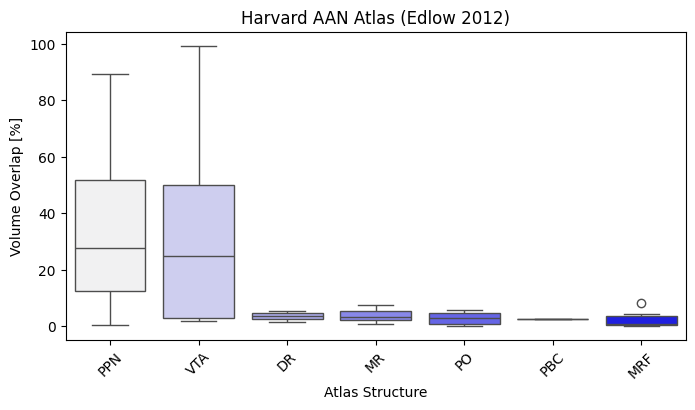

In [196]:
#boxplot for Harvard AAN Atlas
plt.figure(figsize=(8,4))
ax = sns.boxplot(x=aan_abs_overlap_cols['area'],y=aan_abs_overlap_cols['perc'],palette='light:b',order=aan_sorted_ids)
ax.set(xlabel = 'Atlas Structure',ylabel='Volume Overlap [%]',title='Harvard AAN Atlas (Edlow 2012)')
ax.tick_params(axis='x', rotation=45)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_77755/868342574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=cit_abs_overlap_cols['area'],y=cit_abs_overlap_cols['perc'],palette='dark:salmon_r',order=cit_sorted_ids)


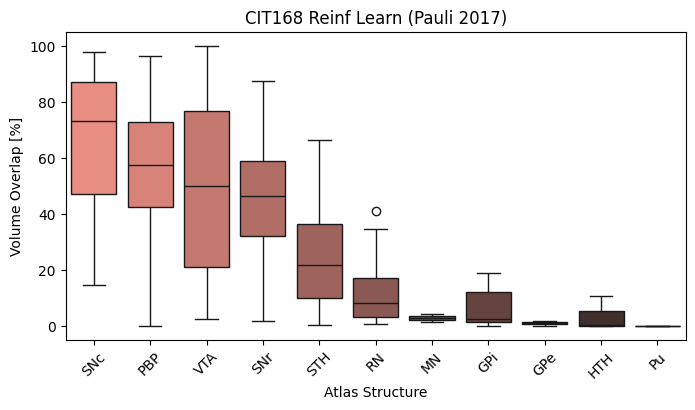

In [220]:
#boxplot for CIT168 Atlas
plt.figure(figsize=(8,4))
ax = sns.boxplot(x=cit_abs_overlap_cols['area'],y=cit_abs_overlap_cols['perc'],palette='dark:salmon_r',order=cit_sorted_ids)
ax.set(xlabel = 'Atlas Structure',ylabel='Volume Overlap [%]',title='CIT168 Reinf Learn (Pauli 2017)')
ax.tick_params(axis='x', rotation=45)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_77755/2079935037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=n_abs_overlap_cols['area'],y=n_abs_overlap_cols['perc'],palette='vlag',order=n_sorted_ids)


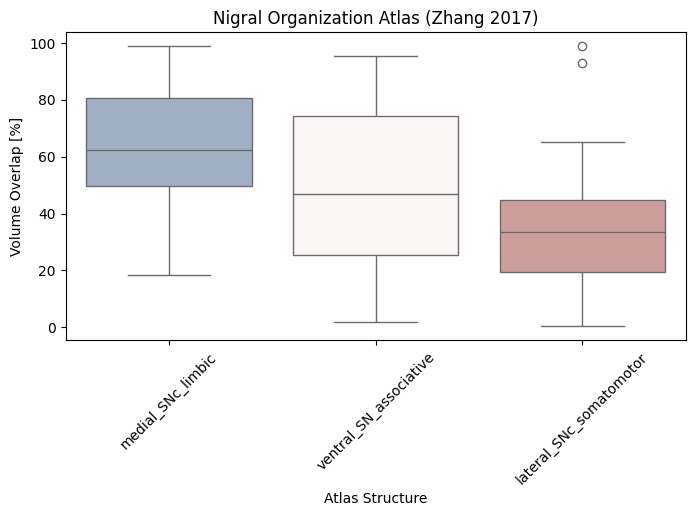

In [224]:
#boxplot for Nigral Atlas
plt.figure(figsize=(8,4))
ax = sns.boxplot(x=n_abs_overlap_cols['area'],y=n_abs_overlap_cols['perc'],palette='vlag',order=n_sorted_ids)
ax.set(xlabel = 'Atlas Structure',ylabel='Volume Overlap [%]',title='Nigral Organization Atlas (Zhang 2017)')
ax.tick_params(axis='x', rotation=45)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_77755/2904456417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=mp_abs_overlap_cols['area'],y=mp_abs_overlap_cols['perc'],palette='coolwarm_r',order=mp_sorted_ids)


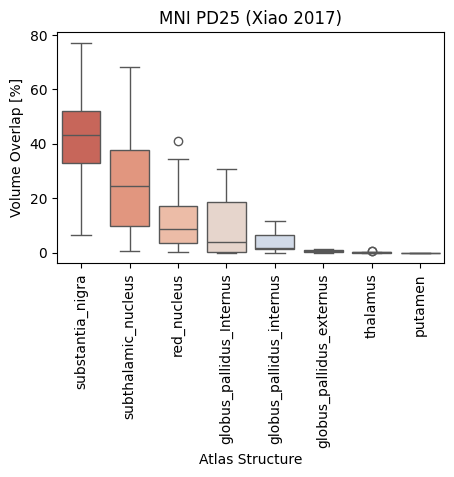

In [259]:
#boxplot for MNI PD25 Atlas
plt.figure(figsize=(5,3))
ax = sns.boxplot(x=mp_abs_overlap_cols['area'],y=mp_abs_overlap_cols['perc'],palette='coolwarm_r',order=mp_sorted_ids)
ax.set(xlabel = 'Atlas Structure',ylabel='Volume Overlap [%]',title='MNI PD25 (Xiao 2017)')
ax.tick_params(axis='x', rotation=90)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_77755/2308858025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=hh_abs_overlap_cols['area'],y=hh_abs_overlap_cols['perc'],palette='icefire',order=hh_sorted_ids)


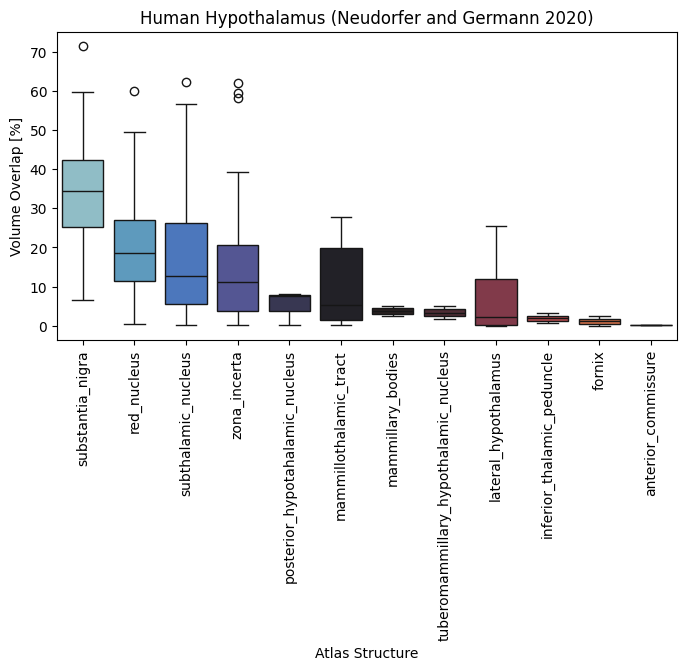

In [260]:
#boxplot for Human Hypothalamus Atlas
plt.figure(figsize=(8,4))
ax = sns.boxplot(x=hh_abs_overlap_cols['area'],y=hh_abs_overlap_cols['perc'],palette='icefire',order=hh_sorted_ids)
ax.set(xlabel = 'Atlas Structure',ylabel='Volume Overlap [%]',title='Human Hypothalamus (Neudorfer and Germann 2020)')
ax.tick_params(axis='x', rotation=90)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_77755/3309483947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=hf_abs_overlap_cols['area'],y=hf_abs_overlap_cols['perc'],palette='Purples',order=hf_sorted_ids)


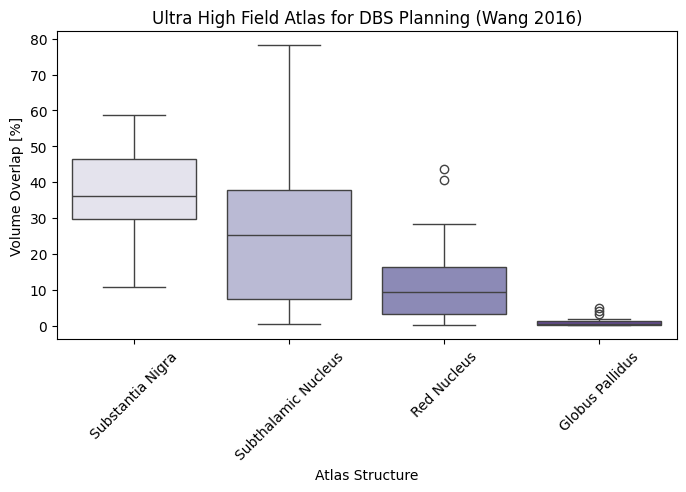

In [245]:
#boxplot for High Field DBS Planning Atlas
plt.figure(figsize=(8,4))
ax = sns.boxplot(x=hf_abs_overlap_cols['area'],y=hf_abs_overlap_cols['perc'],palette='Purples',order=hf_sorted_ids)
ax.set(xlabel = 'Atlas Structure',ylabel='Volume Overlap [%]',title='Ultra High Field Atlas for DBS Planning (Wang 2016)')
ax.tick_params(axis='x', rotation=45)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_92893/3740447332.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=all_abs_overlap_cols['area'],y=all_abs_overlap_cols['perc'],palette='magma_r',order=all_sorted_ids)


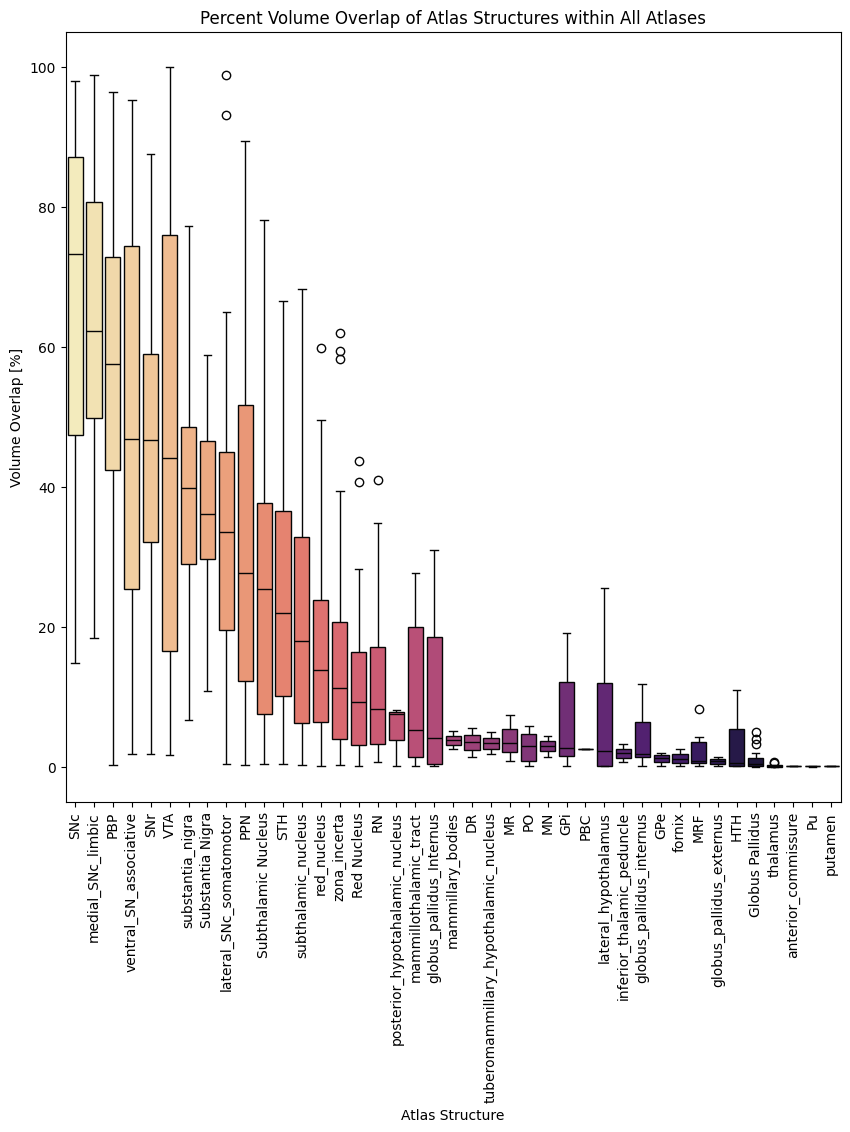

In [4]:
all_abs_overlap_cols = pd.read_csv('/Users/jp1590/Desktop/AADC_Atlases/all_abs_overlap_cols.csv')
all_medians = all_abs_overlap_cols.groupby('area')['perc'].median().sort_values(ascending=False)
all_sorted_ids = all_medians.index.tolist()
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=all_abs_overlap_cols['area'],y=all_abs_overlap_cols['perc'],palette='magma_r',order=all_sorted_ids)
ax.set(xlabel = 'Atlas Structure',ylabel='Volume Overlap [%]',title='Percent Volume Overlap of Atlas Structures within All Atlases')
ax.tick_params(axis='x', rotation=90)